# How to handle missing values in Python? PART 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams["figure.figsize"] = 20, 5

# Beehive metrics - numeric data
Beehive Metrics - Sensors metrics of a bee community https://www.kaggle.com/se18m502/bee-hive-metrics?select=temperature_wurzburg.csv

In [2]:
df = pd.read_csv("temperature_schwartau.csv")

In [3]:
df.head()

,timestamp,temperature
0,2017-01-01 14:10:00,NaN
1,2017-01-01 14:15:00,12.340
2,2017-01-01 14:20:00,12.270
3,2017-01-01 14:25:00,12.276
4,2017-01-01 14:30:00,12.356


In [4]:
df.dtypes

timestamp       object
temperature    float64
dtype: object

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df.dtypes

timestamp      datetime64[ns]
temperature           float64
dtype: object

In [7]:
df.set_index("timestamp", inplace=True)

In [8]:
df = df.loc["2018-04-23":"2018-05-07"]

In [9]:
df.head()

,temperature
timestamp,
2018-04-23 00:00:00,16.524
2018-04-23 00:05:00,16.470
2018-04-23 00:10:00,16.456
2018-04-23 00:15:00,16.404
2018-04-23 00:20:00,16.390


# plots data

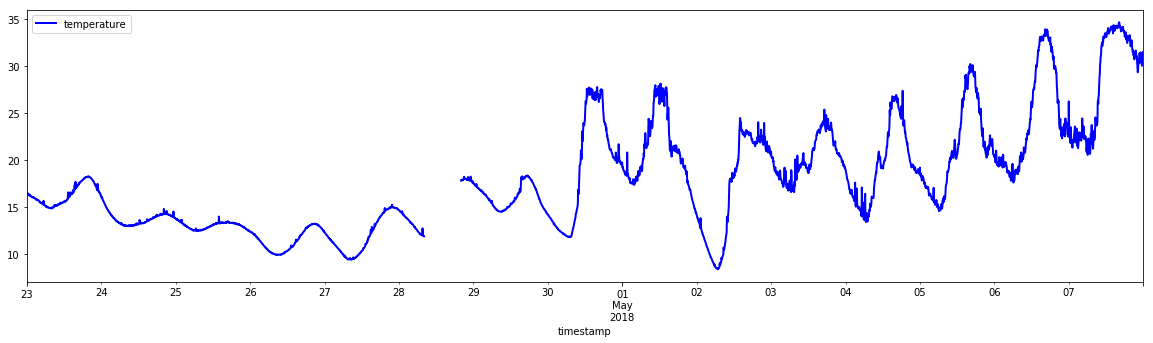

In [24]:
df.plot(kind='line', linewidth=2, color="blue")
plt.savefig('myimage.svg', format='svg', dpi=2000)
plt.show()

In [11]:
df.isnull().sum()

temperature    142
dtype: int64

In [12]:
df.describe()

,temperature
count,4178.000000
mean,17.961764
std,5.885567
min,8.346000
25%,13.292500
50%,16.849000
75%,21.356000
max,34.660000


# Fill missing values DIFFERENT APPROACHES

## fill with some constant value

In [13]:
df_with_const = df.fillna(df['temperature'].mean())

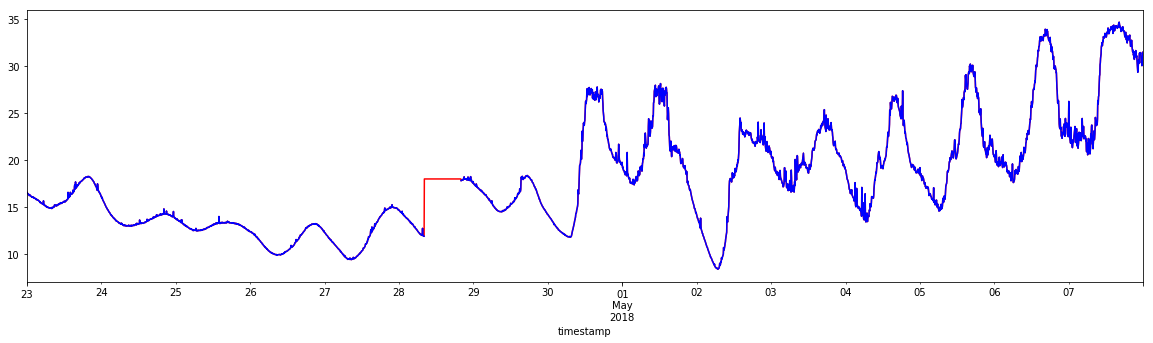

In [14]:
rcParams["figure.figsize"] = 20, 5
df_with_const['temperature'].plot(kind='line', color='red')
df['temperature'].plot(kind='line', color='blue')
plt.show()

## forward fill

In [15]:
df_ffill = df.fillna(method='ffill')

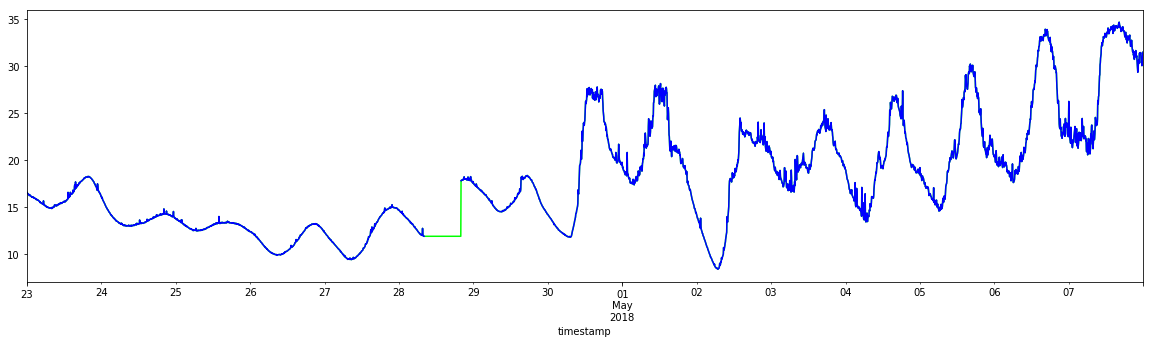

In [16]:
rcParams["figure.figsize"] = 20, 5
df_ffill['temperature'].plot(kind='line', color='lime')
df['temperature'].plot(kind='line', color='blue')
plt.show()

## backward fill

In [17]:
df_bfill = df.fillna(method='bfill')

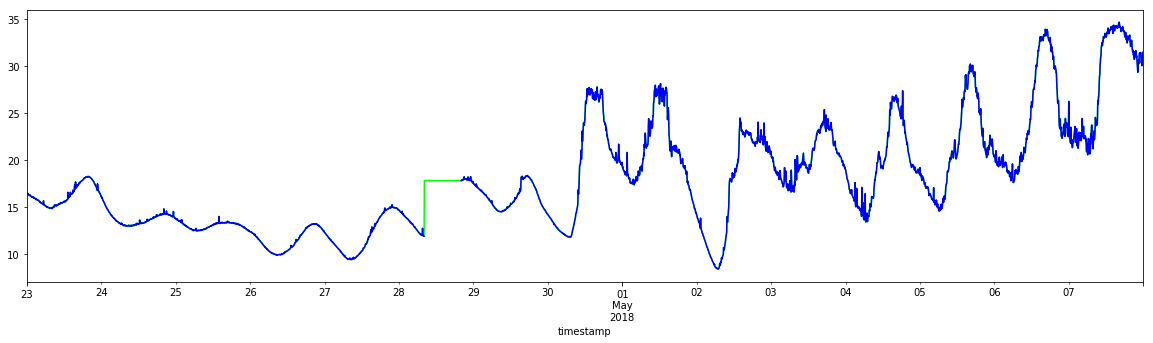

In [18]:
rcParams["figure.figsize"] = 20, 5
df_bfill['temperature'].plot(kind='line', color='lime')
df['temperature'].plot(kind='line', color='blue')
plt.show()

## interpolate()

In [19]:
df_interpolated = df.interpolate()

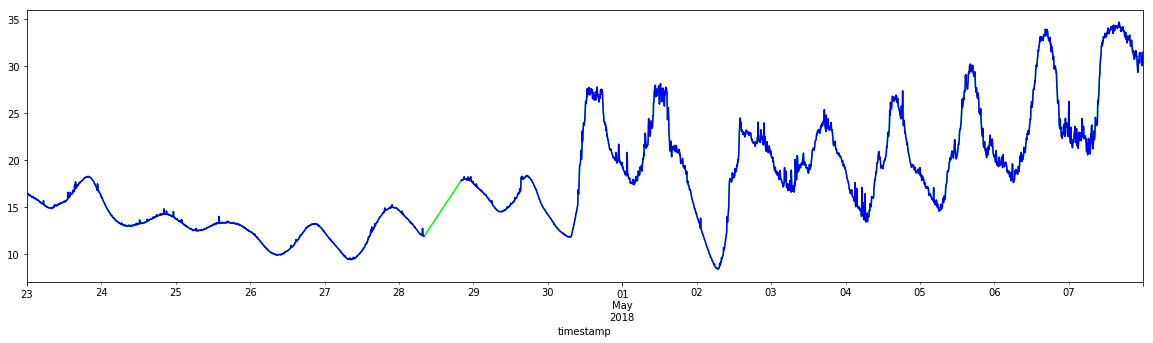

In [20]:
rcParams["figure.figsize"] = 20, 5
df_interpolated['temperature'].plot(kind='line', color='lime')
df['temperature'].plot(kind='line', color='blue')
plt.show()